In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv to Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv


In [ ]:
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [ ]:
print(df.columns)
df[['reviews.text', 'reviews.rating']].dropna().head()

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')


,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [ ]:
df = df[['reviews.text', 'reviews.rating']].dropna()

df = df[df['reviews.rating'] != 3]

df['Sentiment'] = df['reviews.rating'].apply(lambda x: 1 if x > 3 else 0)

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


df['Cleaned_Text'] = df['reviews.text'].apply(clean_text)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Sentiment']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("📊 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


📊 Logistic Regression Accuracy: 0.9833506763787722
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.98      1.00      0.99       945

    accuracy                           0.98       961
   macro avg       0.49      0.50      0.50       961
weighted avg       0.97      0.98      0.98       961



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("📊 Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


📊 Naive Bayes Accuracy: 0.9833506763787722
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.98      1.00      0.99       945

    accuracy                           0.98       961
   macro avg       0.49      0.50      0.50       961
weighted avg       0.97      0.98      0.98       961



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


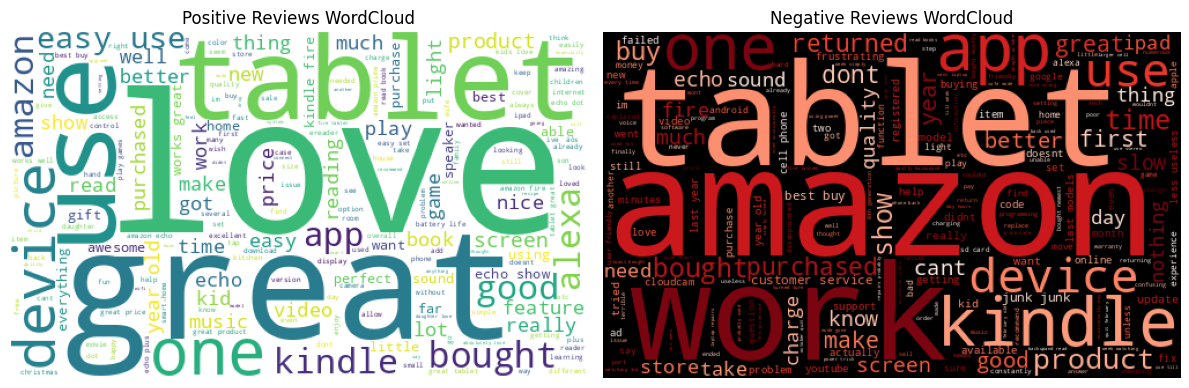

In [ ]:

positive_reviews = ' '.join(df[df['Sentiment'] == 1]['Cleaned_Text'])
negative_reviews = ' '.join(df[df['Sentiment'] == 0]['Cleaned_Text'])


plt.figure(figsize=(12,6))


plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(positive_reviews))
plt.title("Positive Reviews WordCloud")
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color='black', colormap='Reds').generate(negative_reviews))
plt.title("Negative Reviews WordCloud")
plt.axis('off')

plt.tight_layout()
plt.show()
